# Exploring Time Series Data - Introduction

## Loading & Preprocessing Time Series Data
We need to do two things first: 

1. Make sure that we change the dates in our dataset from "non-null object" to "non-null datetime" (i.e., change the data type of dates). This can be done using the `to_datetime()` function from Pandas. To make sure Python understands the date correctly, a `format` argument can be passed [as specified in the documentation](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#providing-a-format-argument).
2. Ensure the date becomes the index. 

In [1]:
#Load Data
import numpy as np
import pandas as pd
temp_data = pd.read_csv('min_temp.csv')
temp_data.head()

,Date,Daily_min
0,1/1/81,20.7
1,2/1/81,17.9
2,3/1/81,18.8
3,4/1/81,14.6
4,5/1/81,15.8


In [2]:
#Checking dataset info
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3650 non-null   object 
 1   Daily_min  3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [3]:
# Convert Date to a datetime column
temp_data['Date'] = pd.to_datetime(temp_data['Date'], format='%d/%m/%y')

In [4]:
# Make Date the index 
temp_data.set_index('Date', inplace=True)

In [5]:
#Checking info again
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Daily_min  3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [12]:
#checking first 5 columns
temp_data.head()

,Daily_min
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


## Resampling
### Dowansampling

Pandas has a simple, powerful, and efficient functionality for performing resampling operations when converting the frequency conversion (e.g., converting monthly data into yearly data) using the `.resample()` method. This is very common in financial applications. [resample](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)

In [8]:
#Changing frequency of timeseries to monthly
temp_monthly = temp_data.resample('MS')

In [9]:
#Calculating monthly mean
month_mean = temp_monthly.mean()

In [13]:
#Checking first 5 columns of monthly mean data
month_mean.head()

,Daily_min
Date,
1981-01-01,17.712903
1981-02-01,17.678571
1981-03-01,13.500000
1981-04-01,12.356667
1981-05-01,9.490323


### Upsampling

In some cases, it is useful to create upsampled time series as well, especially if you're trying to merge several time series with different frequencies. You can do this by using the `.resample()` method with an interval that is more frequent than the timestamp from the original time series. 

In the following cell, we change the frequency of the data to 12 hours (using thr string `'12H'`) and then chain the `.asfreq()` method to return the resulting data.

In [16]:
temp_bidaily = temp_data.resample('12H').asfreq()
temp_bidaily.head()

,Daily_min
Date,
1981-01-01 00:00:00,20.7
1981-01-01 12:00:00,NaN
1981-01-02 00:00:00,17.9
1981-01-02 12:00:00,NaN
1981-01-03 00:00:00,18.8


As you can see, these new timestamps all have missing values in the resulting data. One of the common ways around this is to fill the current missing value with a previous valid one. To do this, you can use the `.ffill()` method as shown below:

In [17]:
temp_bidaily_fill = temp_bidaily.ffill()
temp_bidaily_fill.head()

,Daily_min
Date,
1981-01-01 00:00:00,20.7
1981-01-01 12:00:00,20.7
1981-01-02 00:00:00,17.9
1981-01-02 12:00:00,17.9
1981-01-03 00:00:00,18.8


## Selecting and slicing time series data

Pandas carries the ability to handle date stamp indices allowing quick and handy way of slicing data. For example, we can slice our dataset to only retrieve data points that come after the year 1985:

In [18]:
temp_1985_onwards = temp_data['1985':]
print(temp_1985_onwards.head())
print(temp_1985_onwards.tail())

            Daily_min
Date                 
1985-01-01       13.3
1985-01-02       15.2
1985-01-03       13.1
1985-01-04       12.7
1985-01-05       14.6
            Daily_min
Date                 
1990-12-27       14.0
1990-12-28       13.6
1990-12-29       13.5
1990-12-30       15.7
1990-12-31       13.0


## Dealing With Missing Data

It's pretty common for a time series dataset to have missing values as real-world data tends to be messy and imperfect. The simplest way to detect missing values is either plotting the data and identifying disjoint areas of time series, or by using a combination of `.isnull()` and `.sum()` methods:

When data are missing, they can be handled in a multitude of ways: 
* Drop the data elements with missing values (this may result in low accuracy and loss of valuable information)
* Fill in the missing values under a defined criteria 
* Use advanced machine learning methods to predict the missing values 

In general, the `.fillna()` method can be used along with methods like `.bfill()` of `.ffill()` as an argument/criterion for filling in missing values . `.bfill()` (backward filling) looks for the next valid entry in the time series and fills the gaps with this value. Similarly, `.ffill()` can be used to copy forward the previous valid entry of the time series (as demonstrated above).

In [19]:
#In our case we do not have any missing values
temp_data.isnull().sum()

Daily_min    0
dtype: int64

## Visualizing time series data

Visualizations play an important role in time series analysis. Time series data naturally lends itself to visualization techniques for identifying rises, falls, trends, and noise, etc. Plotting raw time series allows data diagnostics to identify certain trends or events.

Data Source: [Qlik DataMarket](https://www.qlik.com/us/products/qlik-data-market)

In [20]:
nyse = pd.read_csv('NYSE_monthly.csv')
nyse['Month'] = pd.to_datetime(nyse['Month'])
nyse.set_index('Month', inplace=True)

nyse.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


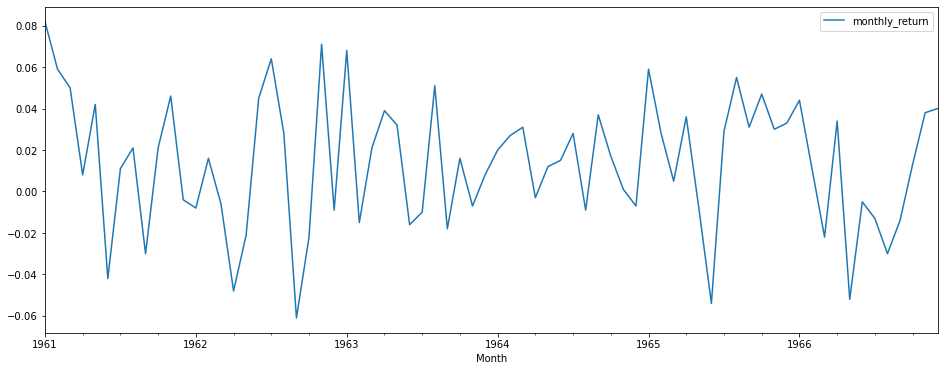

In [21]:
#Line Plot
# Draw a line plot using nyse and .plot() method 
import matplotlib.pyplot as plt
%matplotlib inline

nyse.plot(figsize = (16,6));

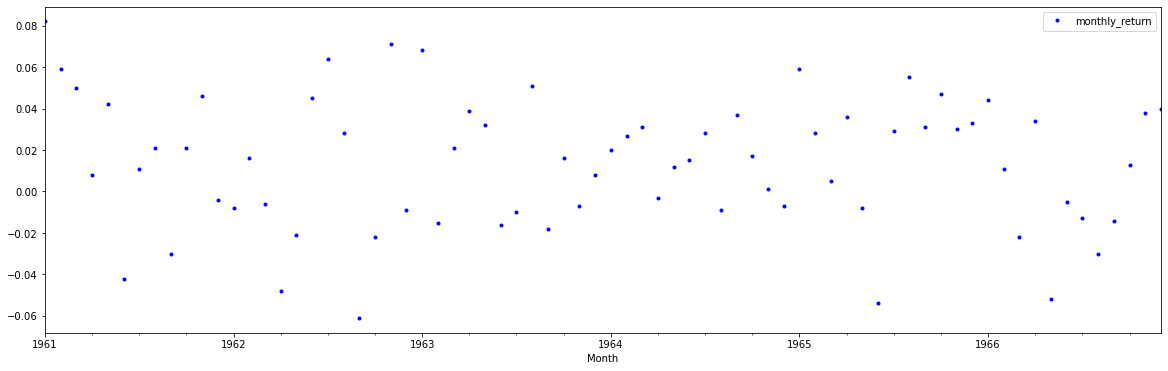

In [22]:
#Dot Plot
nyse.plot(figsize = (20,6), style = '.b');

It's not a surprise to see that the general pattern looks very much similar to the line plot, however, we can identify some outliers that represent very low and very high return months. Dot plots can prove to be very helpful in identifying outliers and very small patterns which may not be so obvious otherwise.

Now, we'll look at how a time series can be regrouped for a given time interval, i.e. weekly/monthly/yearly average values and compare them to identify any changes taking place over time. We'll use the Pandas' [`grouper()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Grouper.html) function in conjunction with the `.groupby()` method to achieve this. 

> The list of aliases for time series frequencies can be found [here](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases).

In [23]:
# Use pandas grouper to group values using annual frequency
year_groups = nyse.groupby(pd.Grouper(freq ='A'))

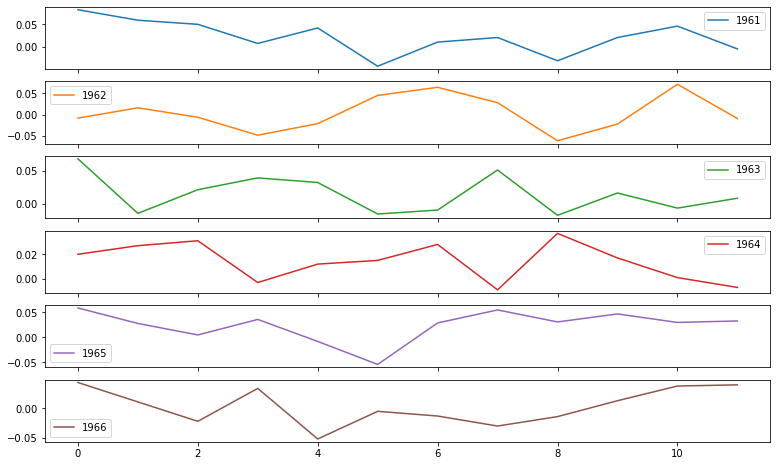

In [24]:
# Create a new DataFrame and store yearly values in columns 
nyse_annual = pd.DataFrame()

for yr, group in year_groups:
    nyse_annual[yr.year] = group.values.ravel()
    
# Plot the yearly groups as subplots
nyse_annual.plot(figsize = (13,8), subplots=True, legend=True);

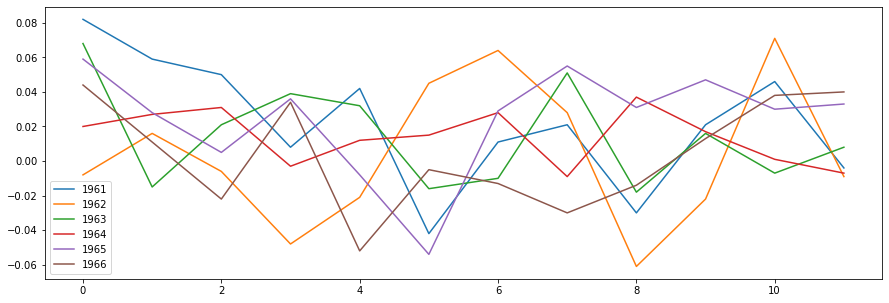

In [25]:
# Plot overlapping yearly groups (disabling subplots)
nyse_annual.plot(figsize = (15,5), subplots=False, legend=True);

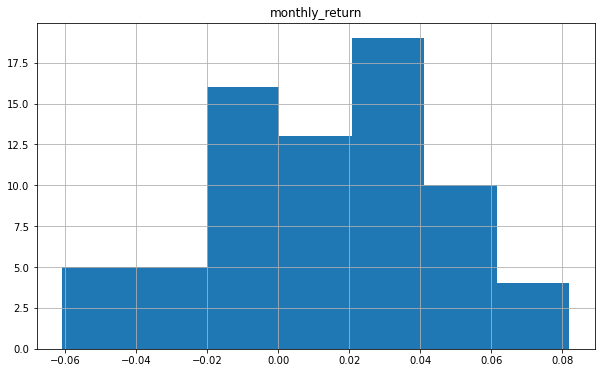

In [26]:
#Histogram
nyse.hist(figsize = (10,6), bins = 7);

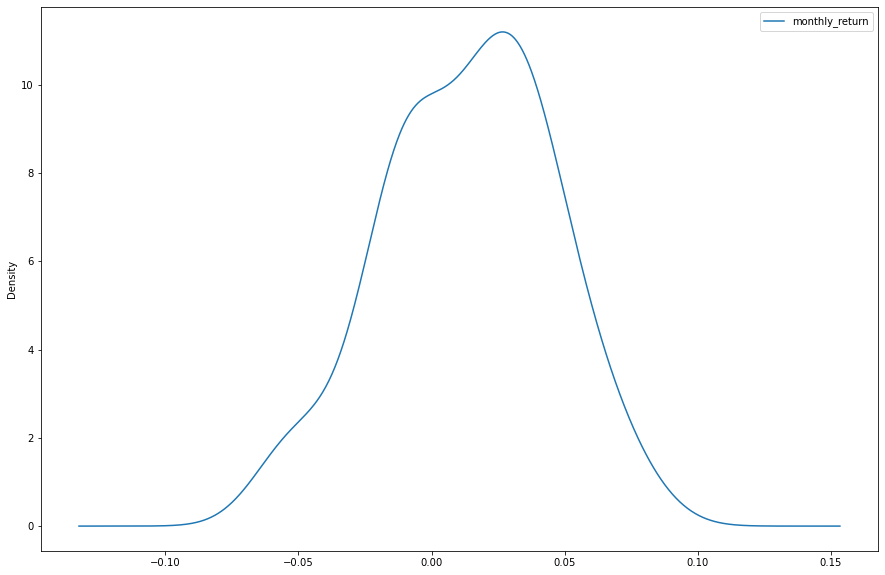

In [27]:
#Density plot for nyse dataset
nyse.plot(kind='kde', figsize = (15,10));

Histograms and density plots provide insight into the distribution of all observations, but we may be interested in the distribution of values by **time interval**.

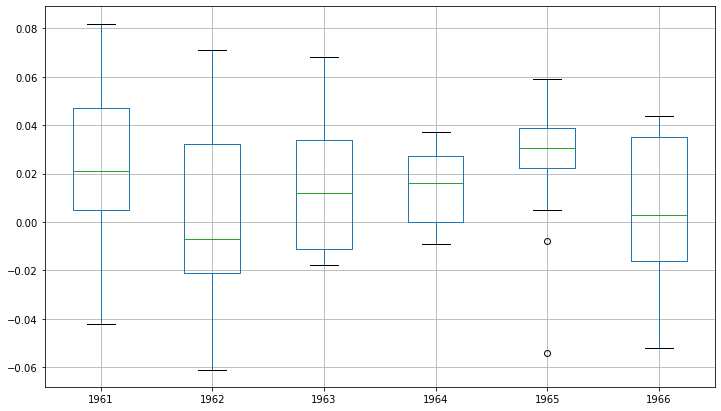

In [28]:
#Box plots
nyse_annual.boxplot(figsize = (12,7));

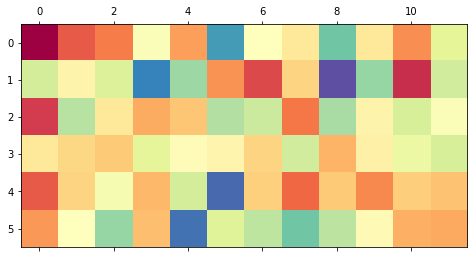

In [29]:
#Heatmap
year_matrix = nyse_annual.T
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r);

Orange/red colors represent higher values, blue represents low values, green represents values in the middle

## Type of Trends & Removing Trends
**Stationarity:** A time series is said to be stationary if its statistical properties such as mean, variance, etc. remain constant over time. Most time series models work on the assumption that **the time series are stationary**. For general time series datasets, if it shows a particular behavior over time, there is a very high probability that it will follow a similar behavior in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

**The mean of the series should not be a function of time rather should be a constant. The image below has the left-hand graph satisfying the condition whereas the graph in red has a time-dependent mean.**
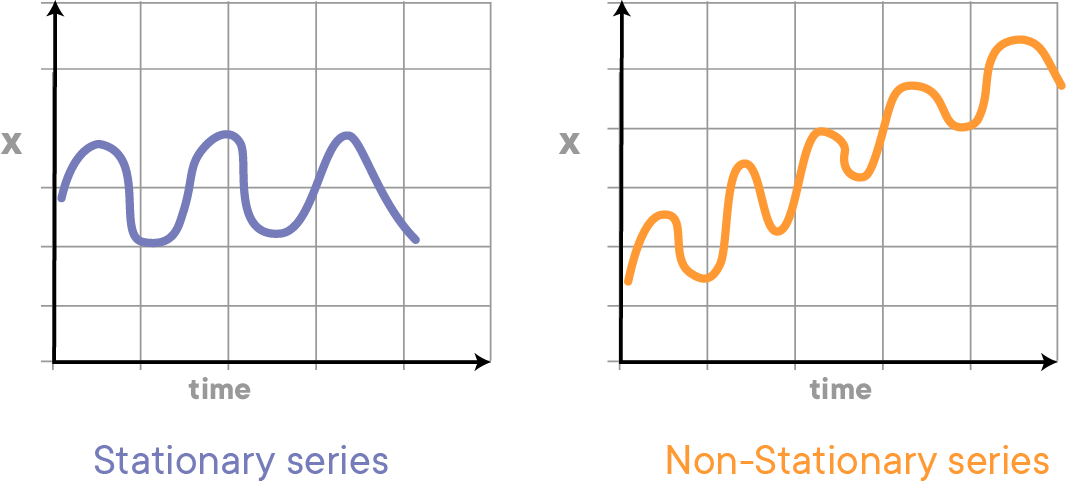

**The variance of the series should not be a function of time. This property is known as homoscedasticity. The following graph depicts what is and what is not a stationary series. (Notice the varying spread of distribution in the right-hand graph)**
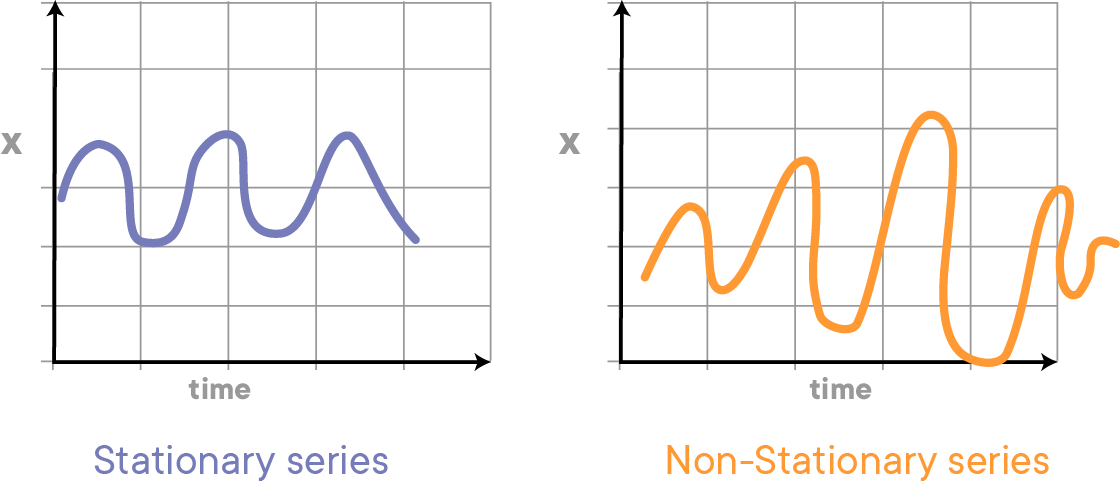

**The covariance of the $i$th term and the $(i + m)$th term should not be a function of time. In the following graph, you will notice the spread becomes closer as the time increases. Hence, the covariance is not constant with time for the ‘red series’ below.**
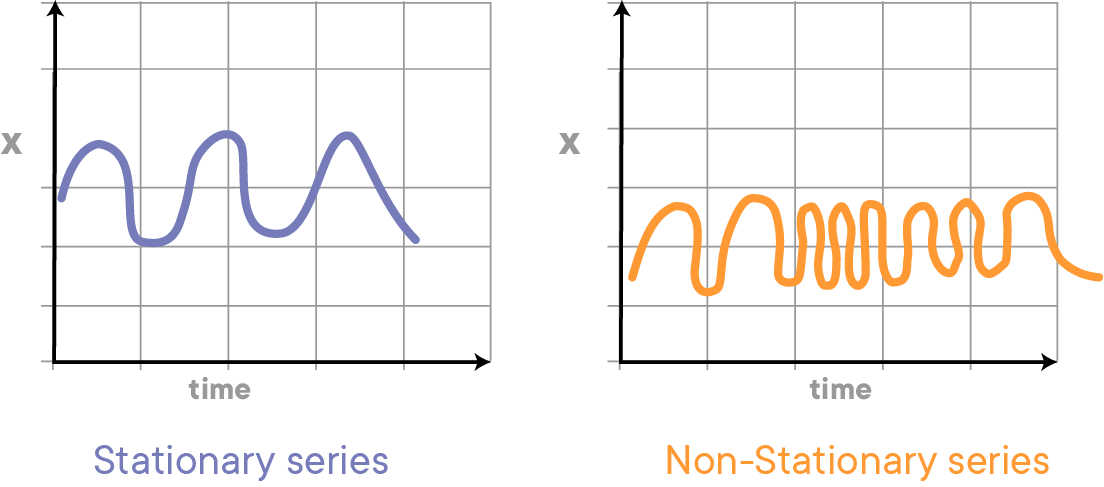

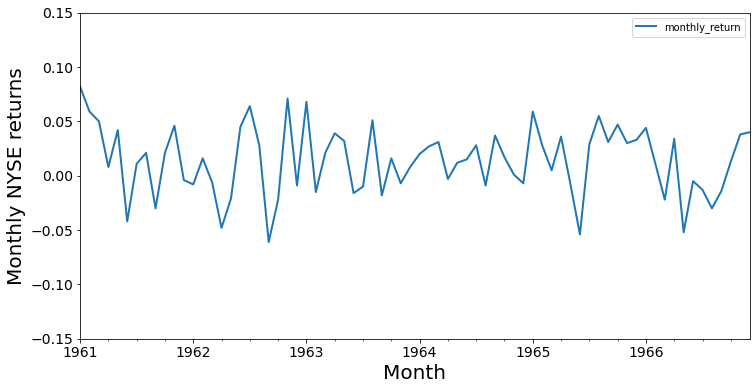

In [32]:
#No Trend
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('NYSE_monthly.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.plot(figsize=(12,6), linewidth=2, fontsize=14)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Monthly NYSE returns', fontsize=20)
plt.ylim((-0.15, 0.15));

<ipython-input-33-17e7ec657b92>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Quarter'] = pd.to_datetime(data['Quarter'])


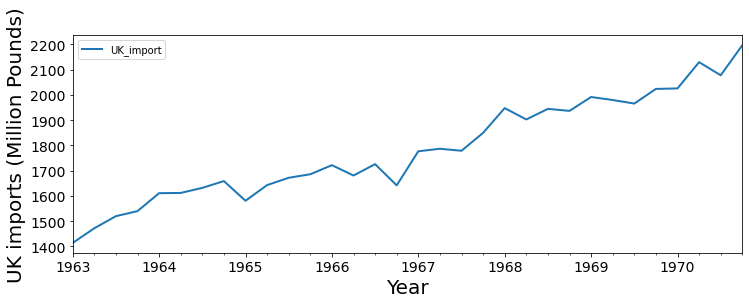

In [33]:
#Linear Trend: Upward Linear
data = pd.read_csv('uk_imports.csv')
data['Quarter'] = pd.to_datetime(data['Quarter'])
data.set_index('Quarter', inplace=True)

data.plot(figsize=(12,4), linewidth=2, fontsize=14)
plt.ylabel('UK imports (Million Pounds)', fontsize=20)
plt.xlabel('Year', fontsize=20);

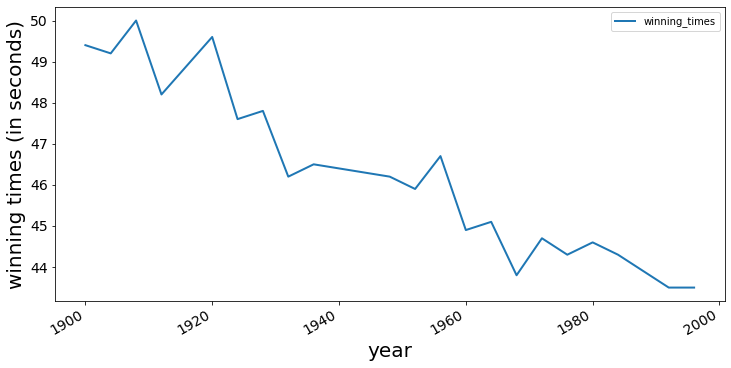

In [34]:
#Linear Trend: Downward Linear
data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)

data.plot(figsize=(12,6), linewidth=2, fontsize=14)
plt.xlabel('year', fontsize=20)
plt.ylabel("winning times (in seconds)", fontsize=20);

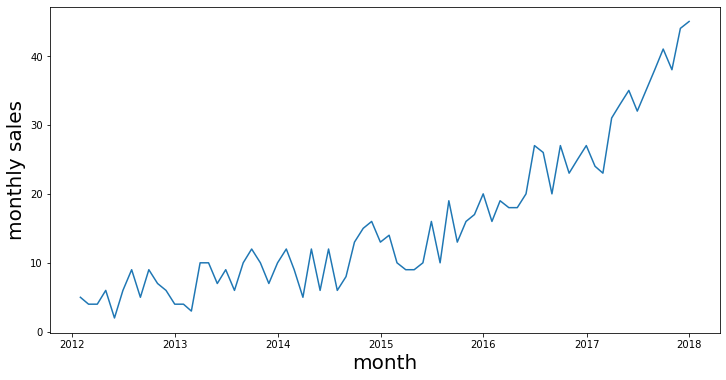

In [35]:
#Exponential Trend
years = pd.date_range('2012-01', periods=72, freq='M')
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales = np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])
data = pd.Series(sales+bigger+6, index=index)
ts = data
fig = plt.figure(figsize=(12,6))
plt.plot(data)
plt.xlabel('month', fontsize=20)
plt.ylabel('monthly sales', fontsize=20)
plt.show()

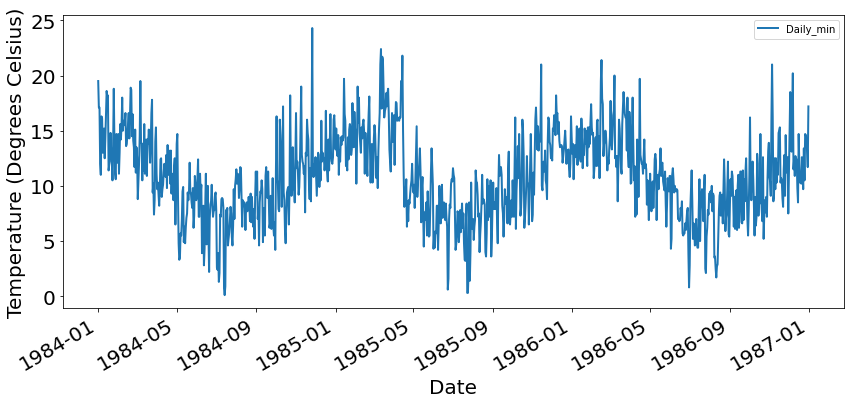

In [36]:
#Periodic Trend
data = pd.read_csv('min_temp.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%y')
data.set_index('Date', inplace=True)

data_slice= data['1984':'1986']
data_slice.plot(figsize=(14,6), linewidth=2, fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Temperature (Degrees Celsius)', fontsize=20);

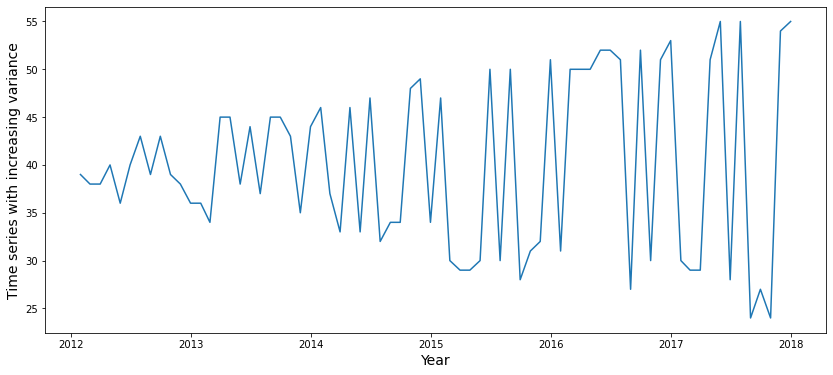

In [37]:
#Trend with increasing variance
years = pd.date_range('2012-01', periods=72, freq='M')
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)

add = np.where(sales>0, 1, -1)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,
                   3,3,3,3,4,4,5,5,6,6,6,6,6,7,7,7,7,7,7,8,8,8,8,8,8,8,
                   9,9,9,9,9,9,9,9,10,10,10,10,10,10,12,12,12,12,12,12,12,12])
data = pd.Series((sales+add*bigger)+40, index=index)

fig = plt.figure(figsize=(14,6))
plt.plot(data)
plt.ylabel('Time series with increasing variance', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()

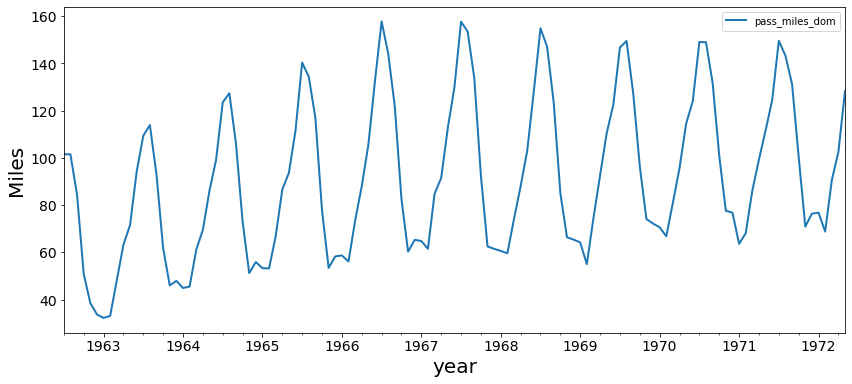

In [38]:
#Periodic and upward trend
air = pd.read_csv('airpassengers.csv')
air['Month'] = pd.to_datetime(air['Month'])
air.set_index('Month', inplace=True)

air.plot(figsize=(14,6), linewidth=2, fontsize=14)
plt.xlabel('year', fontsize=20)
plt.ylabel('Miles', fontsize=20);

### Checking for Trends
- Rolling Statistic - plot the moving average or moving variance and see if it varies with time.
- The Dickey-Fuller Test - The Dickey-Fuller test is a statistical test for testing stationarity. The null-hypothesis for the test is that the time series is not stationary. So if the test statistic is less than the critical value, we reject the null hypothesis and say that the series is stationary. 

Pandas has a built-in method called [rolling()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html), which can be called along with `.mean()` and `.std()` to calculate these rolling statistics. Let's take a window size of 8 for this example.

The Dickey-Fuller test is available in `tsa.stattools` sub-module of the `statsmodels` library. More details on this can be viewed [here](http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html).

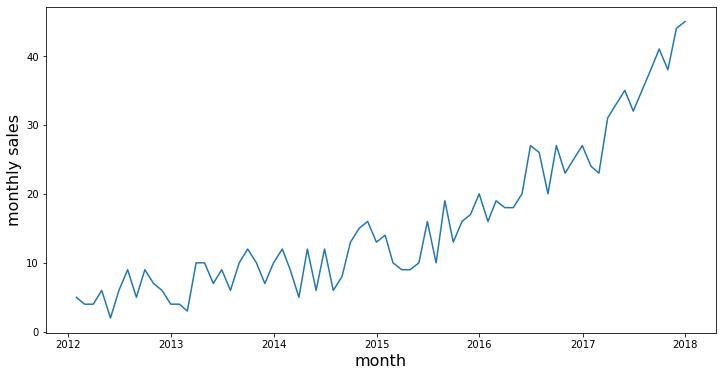

In [39]:
# generated data 
years = pd.date_range('2012-01', periods=72, freq='M')
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])
data = pd.Series(sales+bigger+6, index=index)
ts = data
fig = plt.figure(figsize=(12,6))
plt.plot(data)
plt.xlabel('month', fontsize=16)
plt.ylabel('monthly sales', fontsize=16)
plt.show()

In [40]:
roll_mean = ts.rolling(window=8, center=False).mean()
roll_std = ts.rolling(window=8, center=False).std()

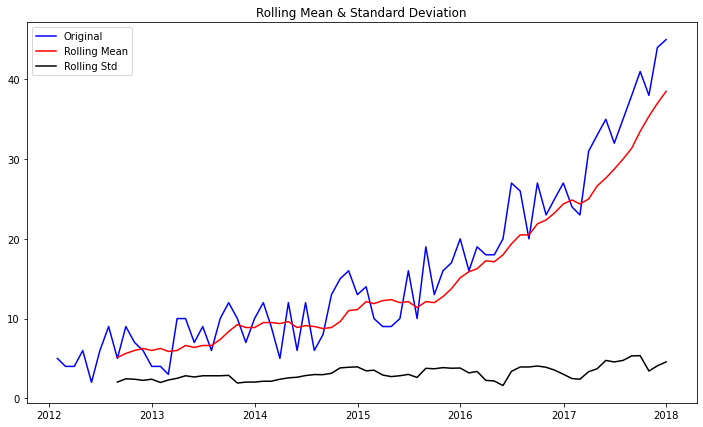

In [41]:
fig = plt.figure(figsize=(12,7))
plt.plot(ts, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

**The red and black lines represent the rolling mean and rolling standard deviations. You can see that the mean is not constant over time, so we can reconfirm our conclusion that the time series is not stationary based on rolling mean and rolling standard error.**

In [42]:
#Performing Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(ts)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

(3.761375741674094, 1.0, 8, 63, {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}, 314.84474355172597)


A nice print-out of the Dickey-Fuller test can be found below. The p-value is 1 here, so the time series is not stationary!

In [43]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  3.761376
p-value                         1.000000
#Lags Used                      8.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


## Removing Stationarity
Although the stationarity assumption is required in several time series modeling techniques, few practical time series are stationary.  In reality, it is almost impossible to make a series perfectly stationary. Techniques: Log Transformation; Subtracting Rolling Mean; Differencing

### Log Transformation

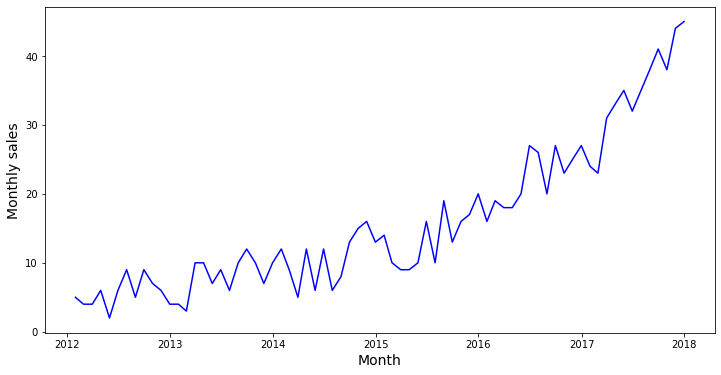

In [44]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Generated monthly sales
years = pd.date_range('2012-01', periods=72, freq='M')
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])
final_series = sales+bigger+6
data = pd.Series(final_series, index=index)
fig = plt.figure(figsize=(12,6))
plt.plot(data, color='blue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Monthly sales', fontsize=14)
plt.show()

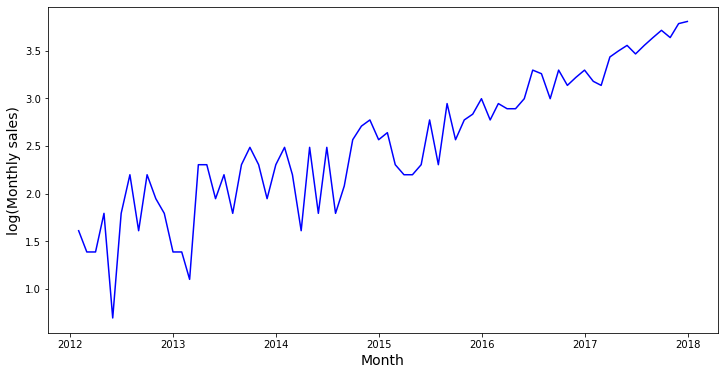

In [45]:
#Log transform and compare output with original
data = pd.Series(np.log(final_series), index=index)
fig = plt.figure(figsize=(12,6))
plt.plot(data, color='blue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('log(Monthly sales)', fontsize=14)
plt.show()

You can notice here that this series is not stationary (yet), but taking the log did make the trend more linear, which might be a first step in the right direction. The issue is however that there seems to be more heteroscedasticity in the model now. Let's look at what happens if you take the square root of this series.

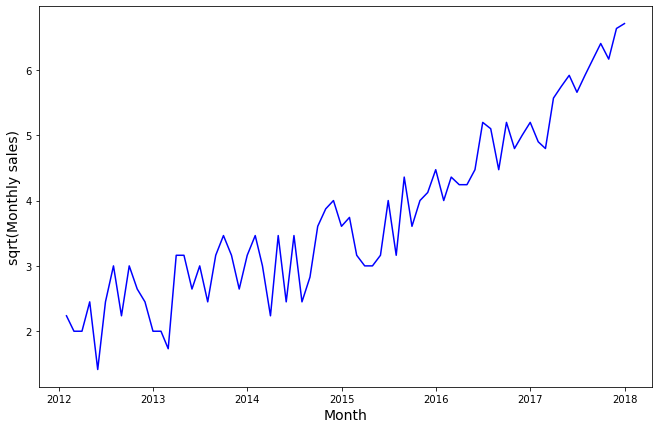

In [46]:
data = pd.Series(np.sqrt(final_series), index=index)
fig = plt.figure(figsize=(11,7))
plt.plot(data, color='blue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('sqrt(Monthly sales)', fontsize=14)
plt.show()

This looks a little better, but still not ideal in this case. You'll notice that for some data the log or square root transform is really the way to go.

### Subtracting the rolling mean
Calculate the rolling mean and subtract it from the time series to make sure your time series is stationary.

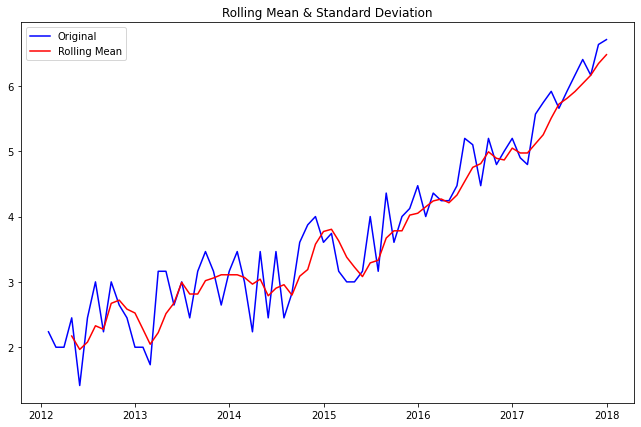

In [47]:
roll_mean = data.rolling(window=4).mean()
fig = plt.figure(figsize=(11,7))
plt.plot(data, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

The red line shows the rolling mean. Let's subtract this from the original series. Note that since we are taking the average of the last four values, the rolling mean is not defined for the first three values.

In [48]:
# Subtract the moving average from the original data
data_minus_roll_mean = data - roll_mean
data_minus_roll_mean.head(15)

2012-01-31         NaN
2012-02-29         NaN
2012-03-31         NaN
2012-04-30    0.278100
2012-05-31   -0.551712
2012-06-30    0.371191
2012-07-31    0.671702
2012-08-31   -0.038875
2012-09-30    0.328611
2012-10-31   -0.074704
2012-11-30   -0.133338
2012-12-31   -0.523810
2013-01-31   -0.273810
2013-02-28   -0.313334
2013-03-31    0.938696
Freq: M, dtype: float64

In [49]:
# Drop the missing values from time series calculated above
data_minus_roll_mean.dropna(inplace=True)

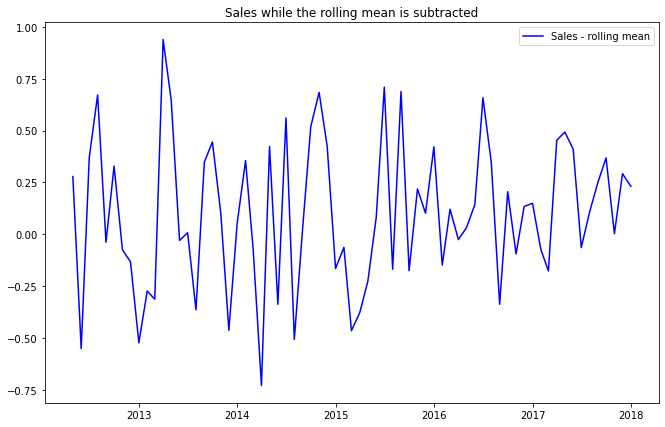

In [50]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_roll_mean, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show(block=False)

This seems to be more or less stationary! Note that you can change the window length, which will affect what your eventual time series will look like.

**The weighted rolling mean**: A drawback of the rolling mean approach is that the window has to be strictly defined. In this case, we can take yearly averages but in complex situations like forecasting a stock price, it may be difficult to come up with an exact number. So we take a "weighted rolling mean" (or weighted moving average, WMA for short) where more recent values are given a higher weight. There are several techniques for assigning weights. A popular one is **Exponentially Weighted Moving Average** where weights are assigned to all the previous values with an exponential decay factor. This can be implemented in Pandas with `.ewm()` method. Details can be found [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ewm.html).

Note that here the parameter `halflife` is used to define the amount of exponential decay. This is just an assumption here and would depend largely on the business domain. Other parameters like span and center of mass can also be used to define decay. These definitions are discussed in the link shared above.

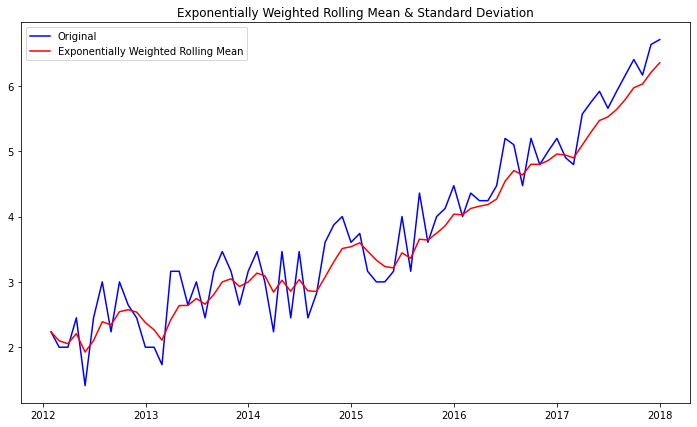

In [51]:
# Use Pandas ewm() to calculate Exponential Weighted Moving Average
exp_roll_mean = data.ewm(halflife=2).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(data, color='blue',label='Original')
mean = plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

In [52]:
# Subtract the moving average from the original data
data_minus_exp_roll_mean = data - exp_roll_mean
data_minus_exp_roll_mean.head(15)

2012-01-31    0.000000
2012-02-29   -0.097783
2012-03-31   -0.053479
2012-04-30    0.241359
2012-05-31   -0.511451
2012-06-30    0.348483
2012-07-31    0.610154
2012-08-31   -0.105735
2012-09-30    0.456502
2012-10-31    0.071338
2012-11-30   -0.087508
2012-12-31   -0.377218
2013-01-31   -0.265499
2013-02-28   -0.375975
2013-03-31    0.743754
Freq: M, dtype: float64

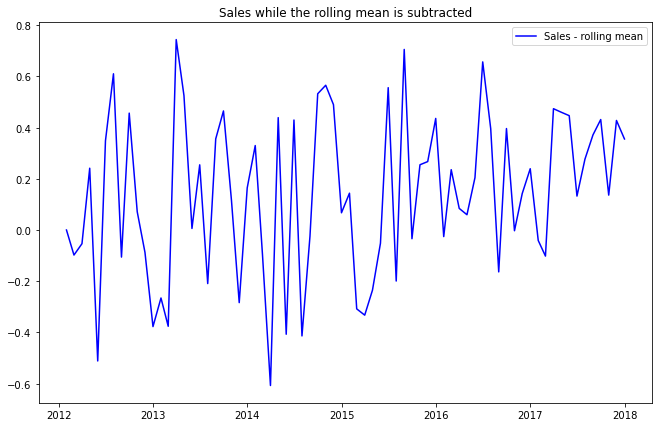

In [53]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_roll_mean, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show(block=False)

For our sales data, subtracting the weighted mean does not seem to have a better effect than simply subtracting the rolling mean. Still, this might be better in some cases.

### Differencing

In [54]:
data_diff = data.diff(periods=1)
data_diff.head(10)

2012-01-31         NaN
2012-02-29   -0.236068
2012-03-31    0.000000
2012-04-30    0.449490
2012-05-31   -1.035276
2012-06-30    1.035276
2012-07-31    0.550510
2012-08-31   -0.763932
2012-09-30    0.763932
2012-10-31   -0.354249
Freq: M, dtype: float64

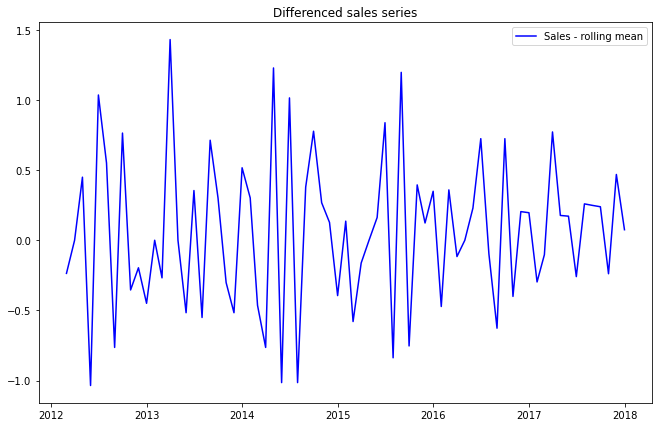

In [55]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

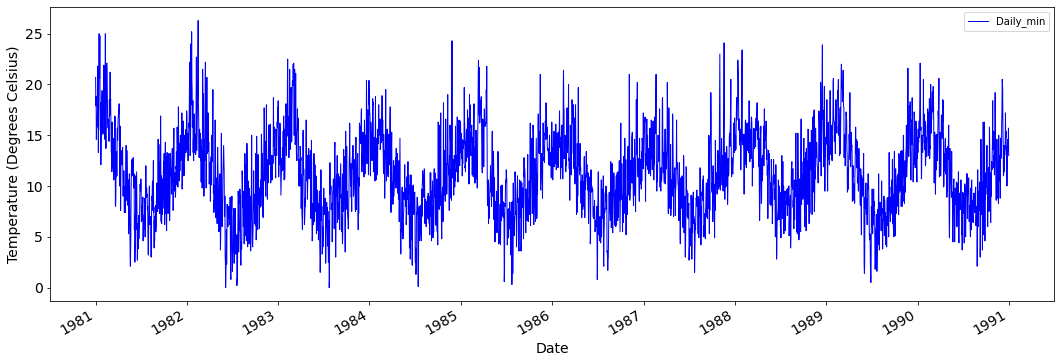

In [56]:
#Differencing Temperature Dataset
data = pd.read_csv('min_temp.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%y')
data.set_index('Date', inplace=True)

data.plot(figsize=(18,6), color='blue', linewidth=1, fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (Degrees Celsius)', fontsize=14);

Here, we differenced our temperature data by taking differences of exactly one year, which removes the cyclical seasonality from the time series data! Pretty magical!

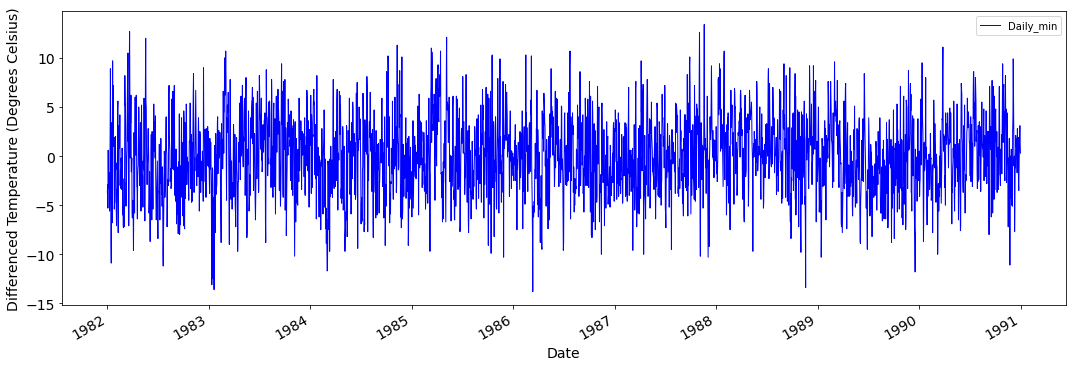

In [57]:
data_diff = data.diff(periods=365)
data_diff.dropna(inplace=True)
data_diff.plot(figsize=(18,6), color='blue', linewidth=1, fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Differenced Temperature (Degrees Celsius)', fontsize=14);

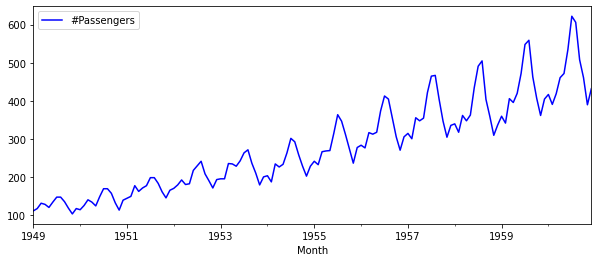

In [60]:
#Stationarity Check Function
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Import the check_stationarity function
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

# Import 'passengers.csv' dataset
data = pd.read_csv('passengers.csv')

# Change the data type of the 'Month' column
data['Month'] = pd.to_datetime(data['Month'])

# Set the 'Month' column as the index
ts = data.set_index('Month')

# Plot the time series
ts.plot(figsize=(10,4), color='blue');

**Time Series Decomposition:** Time series decomposition is a mathematical procedure that transforms a time series into multiple different time series. The original time series is often split into three component series:

- **Seasonal**: Patterns that repeat within a fixed period. For example, a website might receive more visits during weekends; this would produce data with a seasonality of 7 days.

- **Trend**: The underlying trend of the metrics. A website increasing in popularity should show a general trend that goes up.

- **Random**: Also called "noise", "irregular", or "remainder", this is the residual of the original time series after the seasonal and trend series are removed.

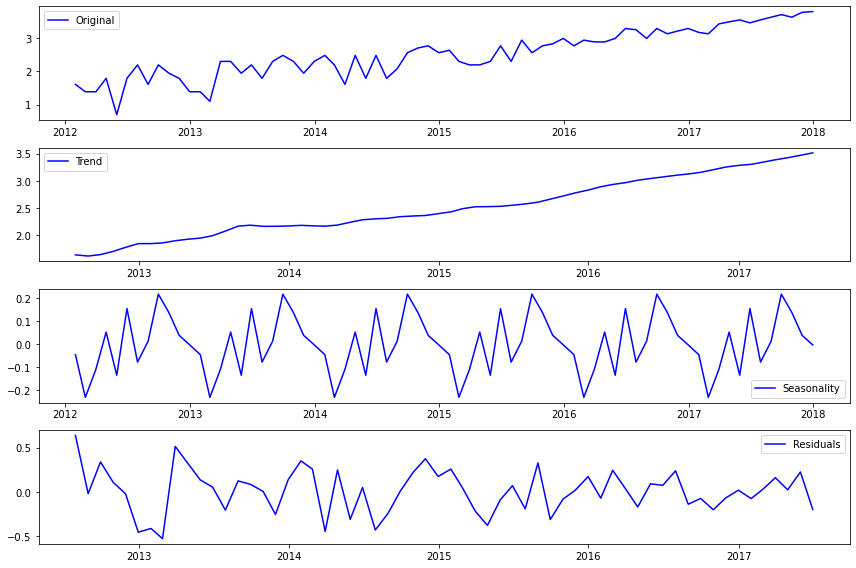

In [58]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(ts))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(ts), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

Using time-series decomposition makes it easier to quickly identify a changing mean or variation in the data. The plot above clearly shows the upward trend of our data, along with its yearly seasonality. These can be used to understand the structure of our time series. The intuition behind time series decomposition is important, as many forecasting methods are built upon this concept of structured decomposition to produce forecasts.

Lets check stationarity of residuals using our `check_stationarity()` function.

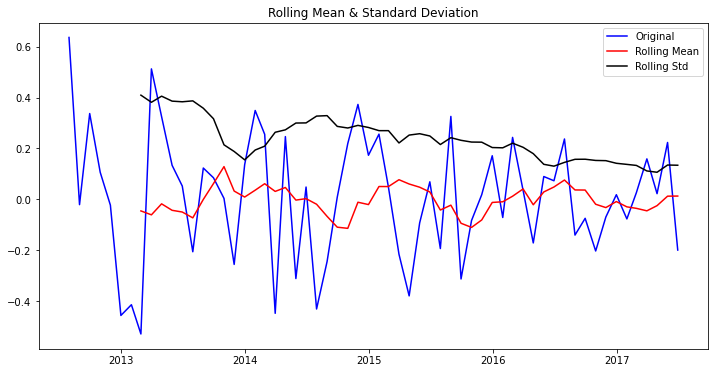

Results of Dickey-Fuller Test: 

Test Statistic                -5.848617e+00
p-value                        3.633560e-07
#Lags Used                     2.000000e+00
Number of Observations Used    5.700000e+01
Critical Value (1%)           -3.550670e+00
Critical Value (5%)           -2.913766e+00
Critical Value (10%)          -2.594624e+00
dtype: float64


In [61]:
# Drop missing values from residuals 
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

# Check stationarity
stationarity_check(ts_log_decompose)

**The Dickey-Fuller test statistic is significant and very well below a (strict) 0.01 mark. So it seems reasonable to assume this time series is stationary.**

## Real World Dataset - Detrending the Air passenger data

In [62]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [63]:
# Import 'passengers.csv' dataset
data = pd.read_csv('passengers.csv')

# Change the data type of the 'Month' column
data['Month'] = pd.to_datetime(data['Month'])

# Set the 'Month' column as the index
ts = data.set_index('Month')

# Print the first five rows
ts.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


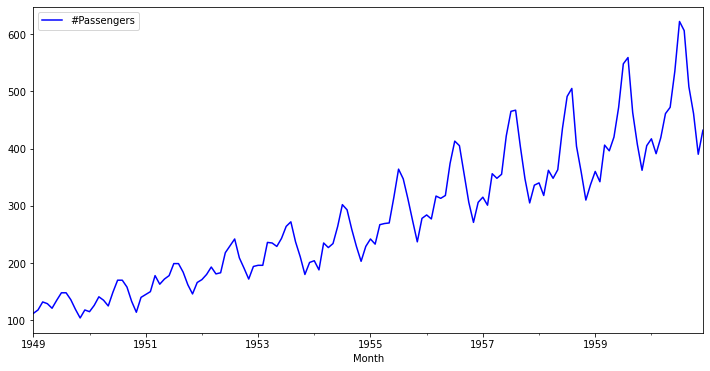

In [65]:
# Plot the time series
ts.plot(figsize=(12,6), color='blue');

In [66]:
# Create a function to check for the stationarity of a given time series using rolling stats and DF test

def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['#Passengers'])
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(TS, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

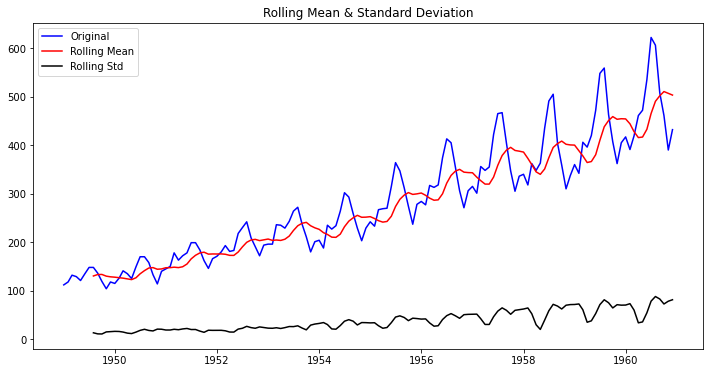

Results of Dickey-Fuller Test: 

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [67]:
stationarity_check(ts)

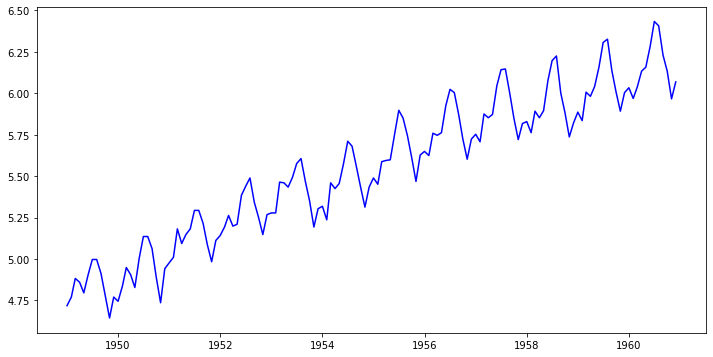

In [68]:
# Plot a log transform
ts_log = np.log(ts)
fig = plt.figure(figsize=(12,6))
plt.plot(ts_log, color='blue');

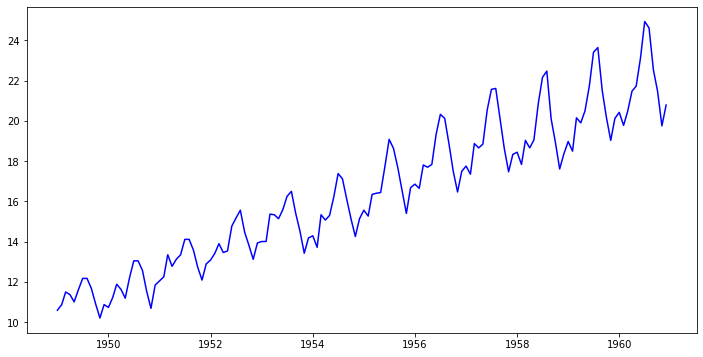

In [69]:
# Plot a square root transform
ts_sqrt = np.sqrt(ts)
fig = plt.figure(figsize=(12,6))
plt.plot(ts_sqrt, color='blue');

**Subtracting Rolling Mean:** Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

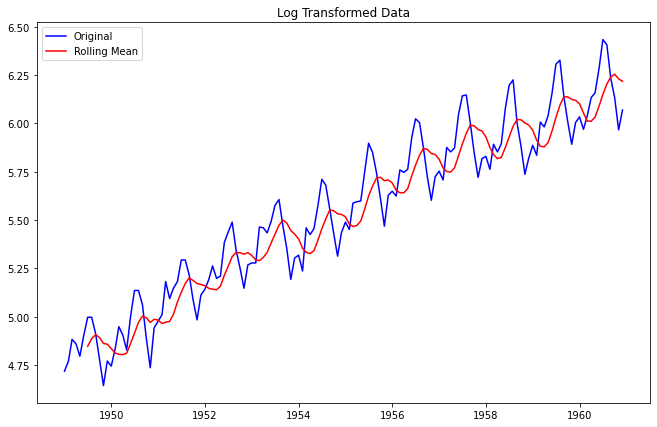

In [70]:
roll_mean = np.log(ts).rolling(window=7).mean()
fig = plt.figure(figsize=(11,7))
plt.plot(np.log(ts), color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Log Transformed Data')
plt.show(block=False)

In [71]:
# Subtract the moving average from the log transformed data
data_minus_roll_mean = np.log(ts) - roll_mean

# Print the first 10 rows
data_minus_roll_mean.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,0.150059
1949-08-01,0.110242
1949-09-01,0.005404


In [72]:
# Drop the missing values
data_minus_roll_mean.dropna(inplace=True)

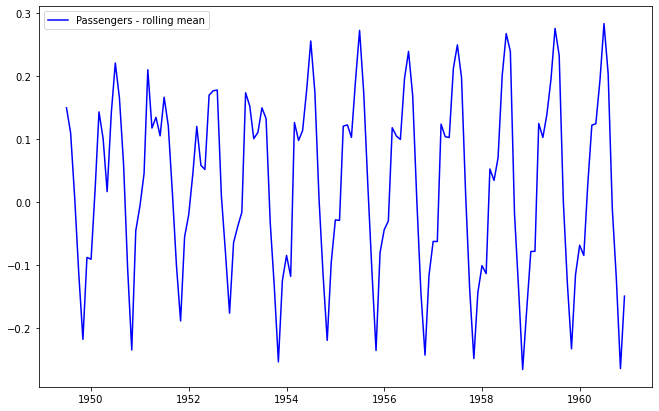

In [73]:
#Plot the series
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_roll_mean, color='blue',label='Passengers - rolling mean')
plt.legend(loc='best')
plt.show(block=False)

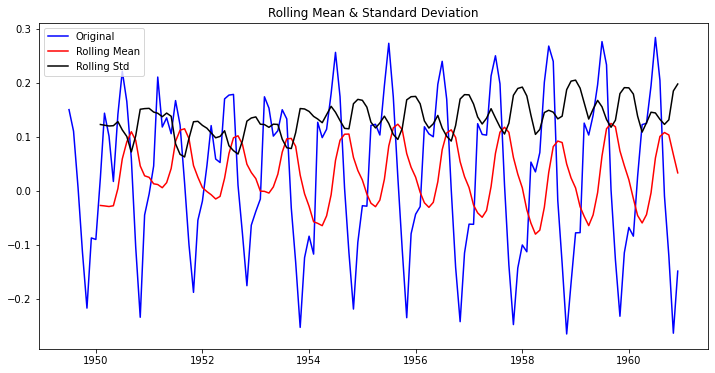

Results of Dickey-Fuller Test: 

Test Statistic                  -2.348027
p-value                          0.156946
#Lags Used                      14.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


In [74]:
stationarity_check(data_minus_roll_mean)

> **The time series are not stationary, as the p-value is still substantial (0.15 instead of smaller than the typical threshold value 0.05).**

**Subtracting Weighted Rolling Mean**: Repeat all the above steps to calculate the exponential *weighted* rolling mean with a halflife of 4. Start from the log-transformed data again. Compare the Dickey-Fuller test results.

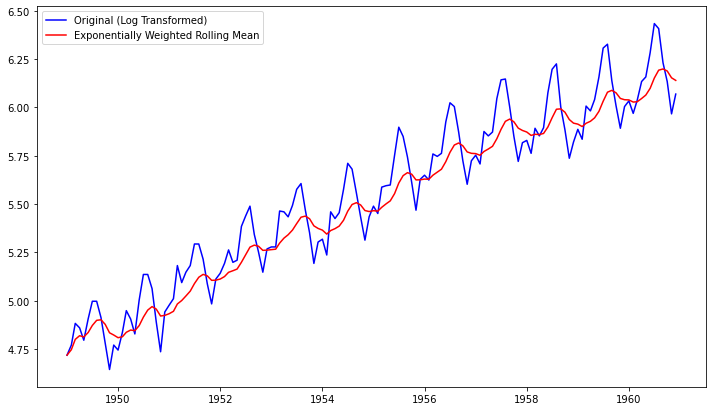

In [75]:
# Calculate Weighted Moving Average of log transformed data
exp_roll_mean = np.log(ts).ewm(halflife=4).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
plt.plot(np.log(ts), color='blue',label='Original (Log Transformed)')
plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.show(block=False)

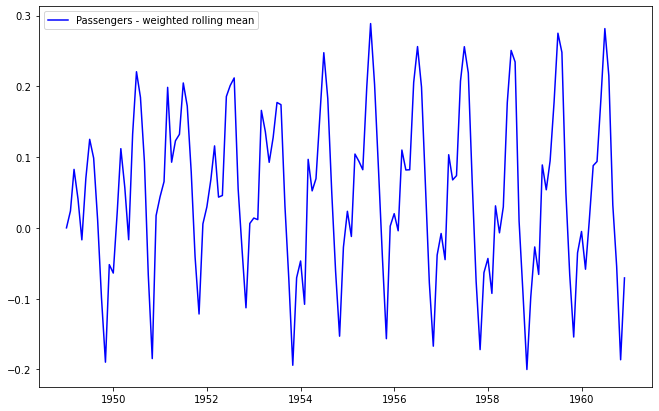

In [76]:
# Subtract the moving average from the original data and check head for Nans
data_minus_exp_roll_mean = np.log(ts) - exp_roll_mean

# Plot the time series
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_roll_mean, color='blue',label='Passengers - weighted rolling mean')
plt.legend(loc='best')
plt.show(block=False)

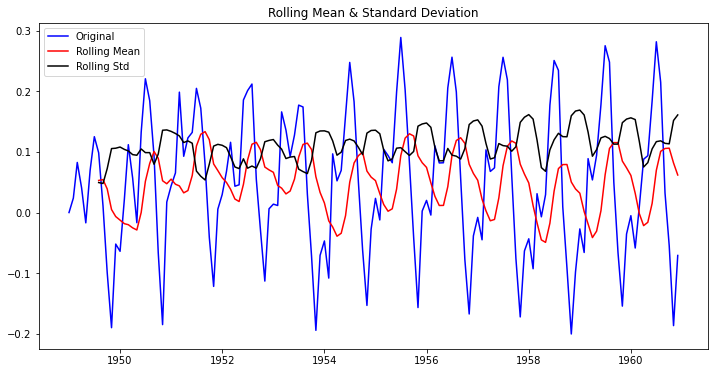

Results of Dickey-Fuller Test: 

Test Statistic                  -3.297250
p-value                          0.015002
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [77]:
stationarity_check(data_minus_exp_roll_mean)

> **The p-value of the Dickey-Fuller test <0.05, so this series seems to be stationary according to this test! 
Do note that there is still strong seasonality.**

**Differencing:** Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now we use differencing to remove seasonality. Making sure we use the right amount of `periods`. We shall start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After differencing the series, we drop the missing values, plot the resulting time series, and then run the `stationarity check()` again.

In [81]:
# Difference your data
data_diff = data_minus_exp_roll_mean.diff(periods=12)

# Drop the missing values
data_diff.dropna(inplace=True)

# Check out the first few rows
data_diff

,#Passengers
Month,
1950-01-01,-0.063907
1950-02-01,-0.001185
1950-03-01,0.029307
1950-04-01,0.016168
1950-05-01,0.000194
...,...
1960-08-01,-0.033138
1960-09-01,-0.017754
1960-10-01,0.011836


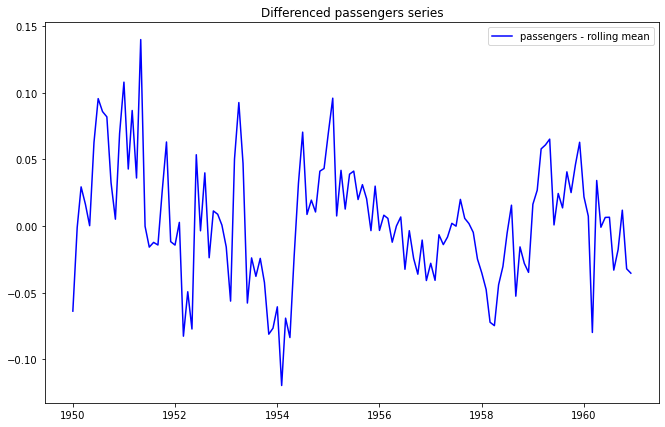

In [82]:
#Plot differenced series
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='passengers - rolling mean')
plt.legend(loc='best')
plt.title('Differenced passengers series')
plt.show(block=False)

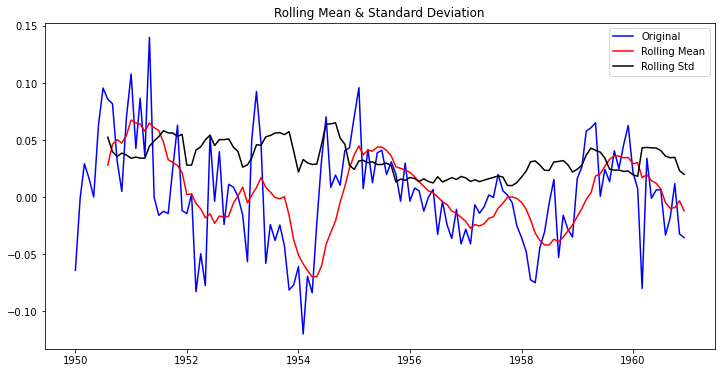

Results of Dickey-Fuller Test: 

Test Statistic                  -3.601666
p-value                          0.005729
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [83]:
stationarity_check(data_diff)

> **Even though the rolling mean and rolling average lines do seem to be fluctuating, the movements seem to be completely random, and the same conclusion holds for the original time series. Your time series is now ready for modeling!**